# EDA

         current_events  travel  photo_sharing  uncategorized  tv_film  \
chatter                                                                  
2                     0       2              2              2        1   
3                     3       2              1              1        1   
6                     3       4              3              1        5   
1                     5       2              2              0        1   
5                     2       0              6              1        0   

         sports_fandom  politics  food  family  home_and_garden  ...  \
chatter                                                          ...   
2                    1         0     4       1                2  ...   
3                    4         1     2       2                1  ...   
6                    0         2     1       1                1  ...   
1                    0         1     0       1                0  ...   
5                    0         2     0       1   

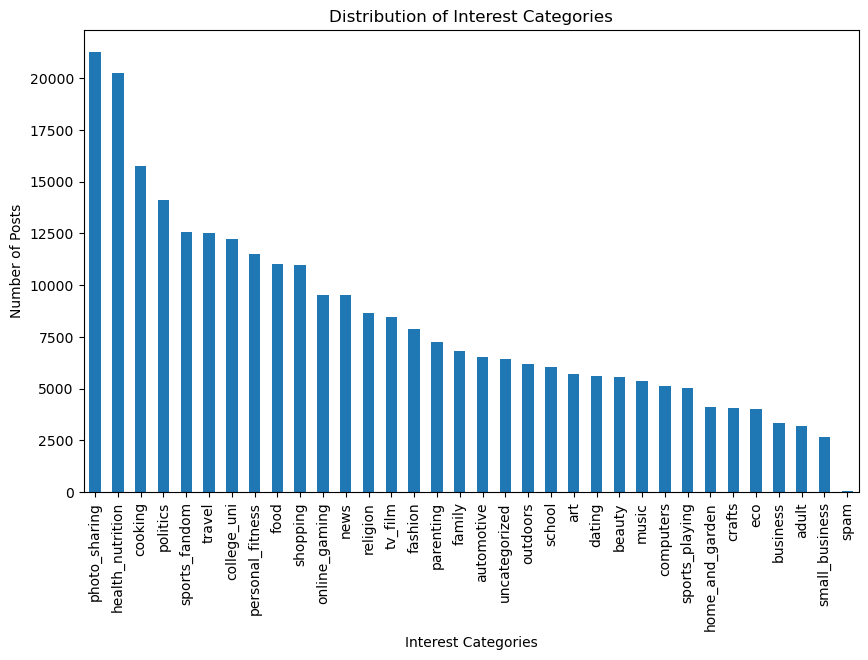

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('social_marketing.csv', index_col=0)

# Display the first few rows of the dataset
print(data.head())

# Explore the distribution of interest categories
interest_columns = data.columns[1:]  # Exclude the first column (user IDs)
interest_counts = data[interest_columns].sum()

# Plot the distribution of interest categories
plt.figure(figsize=(10, 6))
interest_counts.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Interest Categories')
plt.ylabel('Number of Posts')
plt.title('Distribution of Interest Categories')
plt.xticks(rotation=90)
plt.show()

Top keywords of the followers are: photo sharing, health/nutrition, cooking, and politics. By looking at just some of the top keywords, it's hard to tell if there are any clusters or distinctions between possible segments.

# Hierarchical Clustering Dendogram

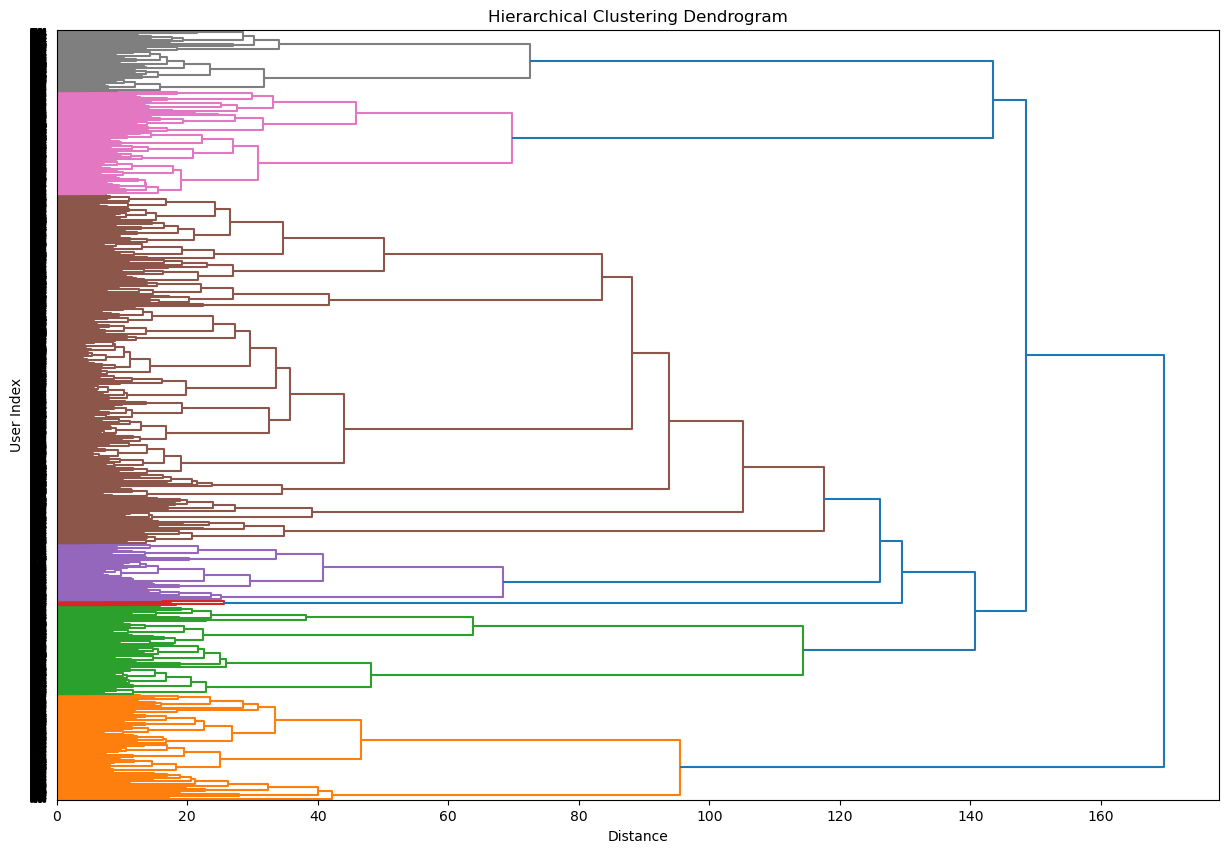

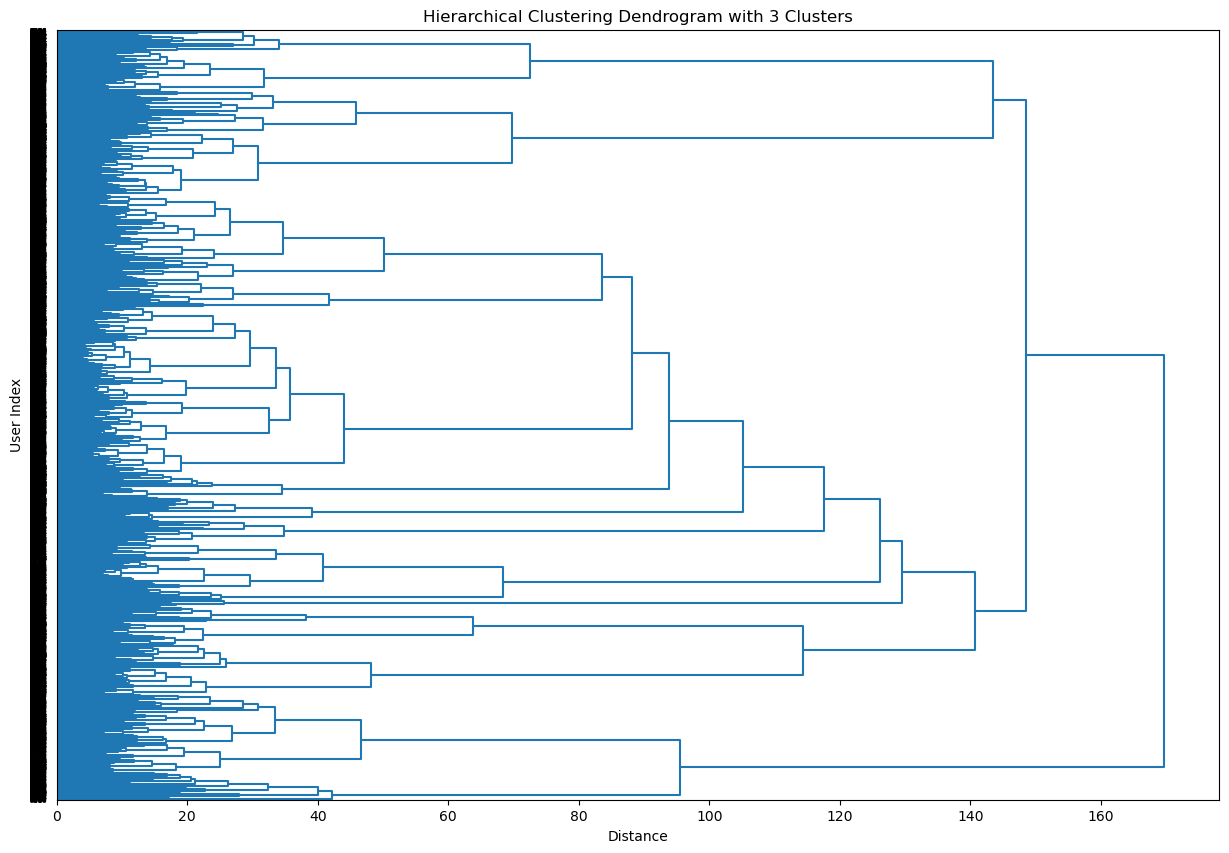

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
df = pd.read_csv('social_marketing.csv')

# Drop the first column (9-digit alphanumeric code)
df = df.drop(df.columns[0], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df.index, orientation='right')
plt.xlabel('Distance')
plt.ylabel('User Index')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut the tree into 3 clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Plot the dendrogram with 3 clusters
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df.index, orientation='right', color_threshold=0)
plt.xlabel('Distance')
plt.ylabel('User Index')
plt.title('Hierarchical Clustering Dendrogram with 3 Clusters')
plt.show()


In [16]:
# Calculate cluster statistics
cluster_stats = df.groupby('cluster').mean()

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display cluster statistics
print(cluster_stats)

         current_events    travel  photo_sharing  uncategorized   tv_film  \
cluster                                                                     
1              1.573937  1.219039       2.289279       0.658041  0.797597   
2              1.517289  1.751905       2.583903       0.805235  1.221528   
3              1.522903  1.312314       3.302796       0.936347  0.785247   

         sports_fandom  politics      food    family  home_and_garden  \
cluster                                                                 
1             4.704251  1.121072  3.666359  2.089649         0.599815   
2             1.120531  2.134011  0.881618  0.657160         0.508107   
3             1.033908  1.166568  1.508031  0.704343         0.508031   

            music      news  online_gaming  shopping  health_nutrition  \
cluster                                                                  
1        0.615527  0.852126       0.974122  1.243068          1.461183   
2        0.651690  1.36882

Here's a summary of the three clusters.
Cluster 1 appear to be religious, family-oriented parents with maybe children in school. Their interests, considering relatively higher means, are food and sports.
Cluster 2 has higher means in words like: politics, online-gaming, tv-film, and college/university. My guess would be teenagers to college students.
Cluster 3 has higher meanas in: fashion, personal fitness, outdoors, beauty, health/nutrients, cooking, and photo sharing. Based on these keywords, this group feels like an 'influencer' type. 